### 3.2 Preparation for Analysis

In [103]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pymc3 as pm

In [13]:
file_beer_sales_2=pd.read_csv('./data/3-2-1-beer-sales-2.csv')
# sample size
print(len(file_beer_sales_2))

100


### 3.4 Data Processing

In [157]:
# Tempareture Range(from 11 to 30)
temperature_pred=np.array((range(11,31)))
print(np.array(temperature_pred,dtype=float))

[11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30.]


In [15]:
# Setting temperature and sales
temperature=file_beer_sales_2['temperature']
sales=file_beer_sales_2['sales']

### 3.5 Modify Model

In [188]:
with pm.Model() as model:
    alpha=pm.Normal('alpha', mu=0, sd=1)
    beta=pm.Normal('beta',mu=0,sd=1)
#     sigma=pm.HalfCauchy('sigma',5)
    sigma=pm.Normal('sigma',mu=20,sd=100)
#     sigma = pm.Uniform('sigma',  0, 100)
    
    mu=pm.Deterministic('mu',alpha+beta*temperature)
    y_pred=pm.Normal('y_pred',mu=mu,sd=sigma,observed=sales)
    sales_pred=pm.Deterministic('sales_pred',alpha+beta*temperature_pred)

In [189]:
with model:
    trace = pm.sample(start=pm.find_MAP(), step=pm.NUTS(), n_init=1000,tune=1000, chains=4, random_seed=1)

logp = -442.56, ||grad|| = 0.14023: 100%|█████████████████████████████████████████████| 14/14 [00:00<00:00, 116.01it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [01:56<00:00, 23.84draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B523967A20>,
      dtype=object)

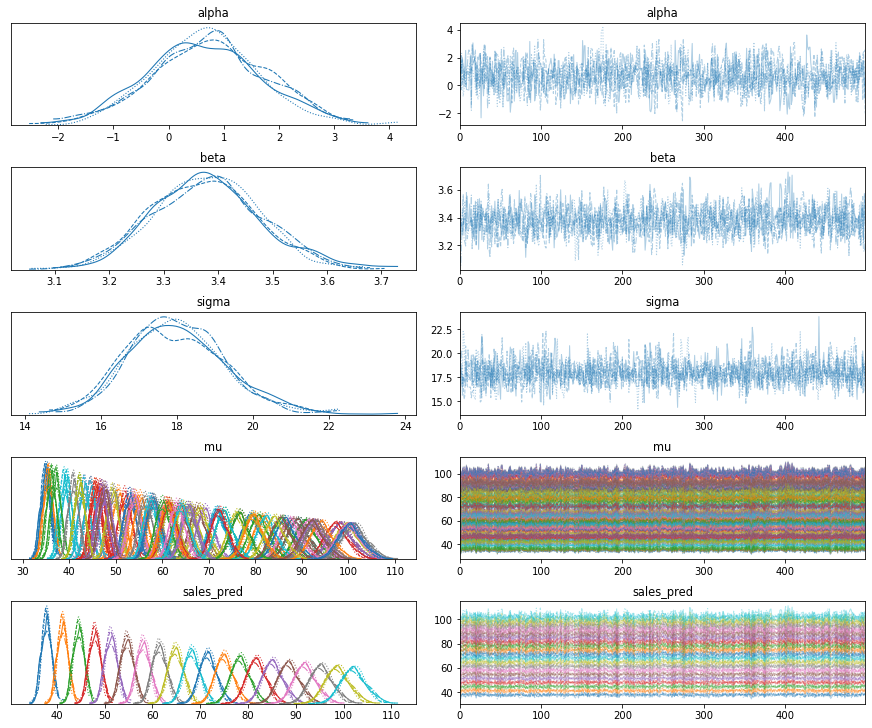

In [190]:
pm.traceplot(trace)

In [191]:
print(trace)

<MultiTrace: 4 chains, 500 iterations, 5 variables>


In [192]:
alpha_m=trace.get_values('alpha',chains=0).mean()
beta_m=trace.get_values('beta',chains=0).mean()

In [ ]:
y_pred=pm.sampling.sample_posterior_predictive(trace,samples=100,model=model)

In [ ]:
pm.forestplot(trace,var_names=['mu'],combined=True,hdi_prob=0.95)

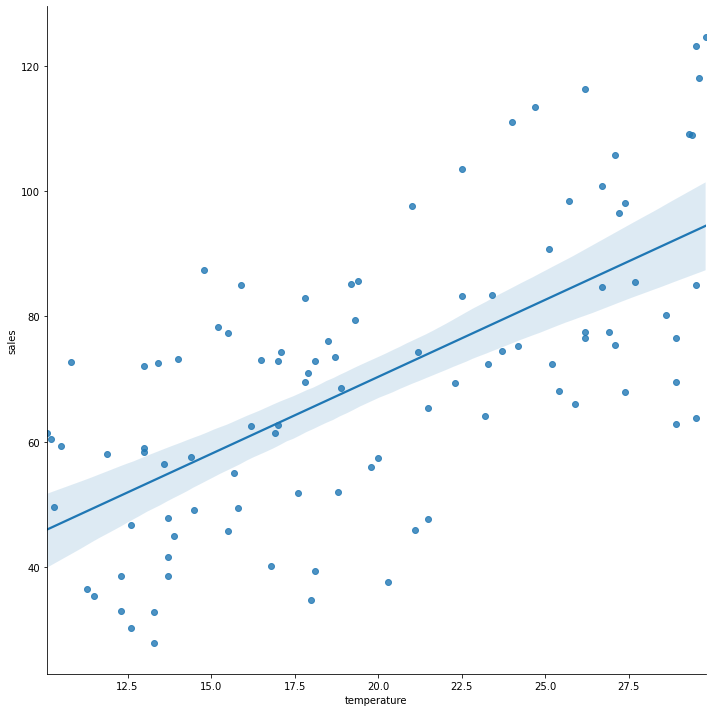

In [193]:
sns.lmplot(x="temperature", y="sales", data=file_beer_sales_2, size=10,ci=95)
x = np.array(range(11,31))
plt.show()